In [35]:
import pandas as pd 
import numpy as np

carac = pd.read_csv("/home/simplon/Téléchargements/caracteristiques-2019(1).csv", delimiter = ";")

In [36]:
carac["year"] = carac["an"]
carac["month"] = carac["mois"]
carac["day"] = carac["jour"]

carac["date"] = pd.to_datetime(carac[["year", "month", "day"]])

In [37]:
from datetime import date
import calendar
my_date = [i for i in carac["date"]]

liste_day = []
for x in my_date: 
    liste_day.append(calendar.day_name[x.weekday()])

carac["journee"] = liste_day

carac["hrmn"].value_counts()

carac["hrmn_new"] = pd.to_datetime(carac['hrmn'],format= '%H:%M' ).dt.time

from datetime import time
liste_time = []
for i in carac["hrmn_new"]:
    if  i <=  time(17,00) and i > time(8,00):
        liste_time.append(1)
    if i <= time(20,00)and i > time(17,00): 
        liste_time.append(2)
    if i <= time(23,59) and i > time(20,00): 
        liste_time.append(3)
    if i <= time(5,00) and i >= time(00,00): 
        liste_time.append(4)
    if i <= time(8,00) and i > time(5,00): 
        liste_time.append(5)

In [38]:
df_time = pd.DataFrame(liste_time)
carac["cat_time"] = df_time

rdata = carac[["Num_Acc", "lum", "dep", "agg", "atm", "date","cat_time", "journee"]]
rdata["dep"].value_counts()

75     5610
93     3130
13     2997
94     2681
69     2523
       ... 
90       47
978      33
977      16
986      10
975       4
Name: dep, Length: 107, dtype: int64

In [39]:
### Correspondance académie département 

ZONES = {'A': ['03','15', '43', '63','07', '26', '38', '73', '74', '01', '42', '69', 
'25', '39', '70', '90', '21', '58', '71', '89', '24', '33', '40', '47', '64', '19',
'23', '87', '16', '17', '79', '86'], 
         'B': ['22','29','35','56', '18', '28', '36', '37', '41', '45', '54', '55', 
'57', '88', '08', '10','51', '52', '67', '68', '02', '60', '80', '59', '62', '14',
               '50', '61', '27', '76', '975', '44', '49', '53', '72', '85', '04', '05', '13', '84', '06', '83'],
         'C':['77', '93', '94', '75', '78', '91', '92', '95', '11', '30', '34',
'48', '66', '09', '12', '31', '32', '46', '65', '81', '82']} 


REGIONS = {
    'Auvergne-Rhône-Alpes': ['01', '03', '07', '15', '26', '38', '42', '43', '63', '69', '73', '74'],
    'Bourgogne-Franche-Comté': ['21', '25', '39', '58', '70', '71', '89', '90'],
    'Bretagne': ['35', '22', '56', '29'],
    'Centre-Val de Loire': ['18', '28', '36', '37', '41', '45'],
    'Corse': ['2A', '2B'],
    'Grand Est': ['08', '10', '51', '52', '54', '55', '57', '67', '68', '88'],
    'Guadeloupe': ['971'],
    'Guyane': ['973'],
    'Hauts-de-France': ['02', '59', '60', '62', '80'],
    'Île-de-France': ['75', '77', '78', '91', '92', '93', '94', '95'],
    'La Réunion': ['974'],
    'Martinique': ['972'],
    'Normandie': ['14', '27', '50', '61', '76'],
    'Nouvelle-Aquitaine': ['16', '17', '19', '23', '24', '33', '40', '47', '64', '79', '86', '87'],
    'Occitanie': ['09', '11', '12', '30', '31', '32', '34', '46', '48', '65', '66', '81', '82'],
    'Pays de la Loire': ['44', '49', '53', '72', '85'],
    'Provence-Alpes-Côte d\'Azur': ['04', '05', '06', '13', '83', '84'],
}
DEPARTMENTS = {
    '01': 'Ain', 
    '02': 'Aisne', 
    '03': 'Allier', 
    '04': 'Alpes-de-Haute-Provence', 
    '05': 'Hautes-Alpes',
    '06': 'Alpes-Maritimes', 
    '07': 'Ardèche', 
    '08': 'Ardennes', 
    '09': 'Ariège', 
    '10': 'Aube', 
    '11': 'Aude',
    '12': 'Aveyron', 
    '13': 'Bouches-du-Rhône', 
    '14': 'Calvados', 
    '15': 'Cantal', 
    '16': 'Charente',
    '17': 'Charente-Maritime', 
    '18': 'Cher', 
    '19': 'Corrèze', 
    '2A': 'Corse-du-Sud', 
    '2B': 'Haute-Corse',
    '21': 'Côte-d\'Or', 
    '22': 'Côtes-d\'Armor', 
    '23': 'Creuse', 
    '24': 'Dordogne', 
    '25': 'Doubs', 
    '26': 'Drôme',
    '27': 'Eure', 
    '28': 'Eure-et-Loir', 
    '29': 'Finistère', 
    '30': 'Gard', 
    '31': 'Haute-Garonne', 
    '32': 'Gers',
    '33': 'Gironde', 
    '34': 'Hérault', 
    '35': 'Ille-et-Vilaine', 
    '36': 'Indre', 
    '37': 'Indre-et-Loire',
    '38': 'Isère', 
    '39': 'Jura', 
    '40': 'Landes', 
    '41': 'Loir-et-Cher', 
    '42': 'Loire', 
    '43': 'Haute-Loire',
    '44': 'Loire-Atlantique', 
    '45': 'Loiret', 
    '46': 'Lot', 
    '47': 'Lot-et-Garonne', 
    '48': 'Lozère',
    '49': 'Maine-et-Loire', 
    '50': 'Manche', 
    '51': 'Marne', 
    '52': 'Haute-Marne', 
    '53': 'Mayenne',
    '54': 'Meurthe-et-Moselle', 
    '55': 'Meuse', 
    '56': 'Morbihan', 
    '57': 'Moselle', 
    '58': 'Nièvre', 
    '59': 'Nord',
    '60': 'Oise', 
    '61': 'Orne', 
    '62': 'Pas-de-Calais', 
    '63': 'Puy-de-Dôme', 
    '64': 'Pyrénées-Atlantiques',
    '65': 'Hautes-Pyrénées', 
    '66': 'Pyrénées-Orientales', 
    '67': 'Bas-Rhin', 
    '68': 'Haut-Rhin', 
    '69': 'Rhône',
    '70': 'Haute-Saône', 
    '71': 'Saône-et-Loire', 
    '72': 'Sarthe', 
    '73': 'Savoie', 
    '74': 'Haute-Savoie',
    '75': 'Paris', 
    '76': 'Seine-Maritime', 
    '77': 'Seine-et-Marne', 
    '78': 'Yvelines', 
    '79': 'Deux-Sèvres',
    '80': 'Somme', 
    '81': 'Tarn', 
    '82': 'Tarn-et-Garonne', 
    '83': 'Var', 
    '84': 'Vaucluse', 
    '85': 'Vendée',
    '86': 'Vienne', 
    '87': 'Haute-Vienne', 
    '88': 'Vosges', 
    '89': 'Yonne', 
    '90': 'Territoire de Belfort',
    '91': 'Essonne', 
    '92': 'Hauts-de-Seine', 
    '93': 'Seine-Saint-Denis', 
    '94': 'Val-de-Marne', 
    '95': 'Val-d\'Oise',
    '971': 'Guadeloupe', 
    '972': 'Martinique', 
    '973': 'Guyane', 
    '974': 'La Réunion', 
    '976': 'Mayotte',
}

zoneA = ['03','15', '43', '63','07', '26', '38', '73', '74', '01', '42', '69', '25', '39', '70', '90', '21', '58', '71', '89', '24', '33', '40', '47', '64', '19',
'23', '87', '16', '17', '79', '86'] 
zoneB =  ['22','29','35','56', '18', '28', '36', '37', '41', '45', '54', '55','57', '88', '08', '10','51', '52', '67', '68', '02', '60', '80', '59', '62', '14','50', '61', '27', '76', '975', '44', '49', '53', '72', '85', '04', '05', '13', '84', '06', '83']
zoneC = ['77', '93', '94', '75', '78', '91', '92', '95', '11', '30', '34','48', '66', '09', '12', '31', '32', '46', '65', '81', '82']
corse = ['2A', '2B']
guadeloupe = ['971', '977', '978']
martinique = ['972']
reunion = ['974']
mayotte = ['976']
wallis_futuna = ['986']
polynesie = ['987']
nouvelle_cal = ['988']
guyane = ['973']
zoneAUTRE = corse + guadeloupe + martinique + reunion + mayotte + wallis_futuna + polynesie + nouvelle_cal + guyane

In [40]:
liste_zone = []
for i in rdata['dep']: 
    if i in zoneA: 
        liste_zone.append("A")
    elif i in zoneB: 
        liste_zone.append("B")
    elif i in zoneC: 
        liste_zone.append("C")
    else: 
        liste_zone.append("AUTRE")

In [41]:
list_zone = pd.DataFrame(liste_zone)

In [42]:
rdata["zone"] = list_zone

<ipython-input-42-f945972152e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdata["zone"] = list_zone


In [43]:
usagers = pd.read_csv("usagers-2019.csv", delimiter = ";")

In [44]:
udata = usagers[["Num_Acc", 'grav']]

In [13]:
udata

,Num_Acc,grav
0,201900000001,4
1,201900000001,4
2,201900000001,1
3,201900000002,4
4,201900000003,1
...,...,...
132972,201900058837,4
132973,201900058838,4
132974,201900058839,3
132975,201900058840,4


In [45]:
grav_moy = udata.groupby('Num_Acc', as_index=False)['grav'].mean()

print(grav_moy)

            Num_Acc  grav
0      201900000001  3.00
1      201900000002  4.00
2      201900000003  2.50
3      201900000004  1.75
4      201900000005  2.00
...             ...   ...
58835  201900058836  4.00
58836  201900058837  3.00
58837  201900058838  4.00
58838  201900058839  3.00
58839  201900058840  2.50

[58840 rows x 2 columns]


In [46]:

rdata['grav_moy'] = grav_moy["grav"]

list_date = []
for i in rdata["date"]: 
   
    list_date.append([i.strftime("%Y"),i.strftime("%m"),i.strftime("%d")])


rdata["new_date"]= list_date


rdata["year"] = rdata["new_date"].apply(lambda x: int(x[0]))
rdata["month"] = rdata["new_date"].apply(lambda y : int(y[1]))
rdata["day"] = rdata["new_date"].apply(lambda z: int(z[2]))



rdata["tuple"] = tuple(rdata["new_date"])


from vacances_scolaires_france import SchoolHolidayDates
import datetime
d = SchoolHolidayDates()

list_vac = []
for i in range(rdata.shape[0]): 
    if rdata["zone"][i] != "AUTRE": 
        list_vac.append(d.is_holiday_for_zone(datetime.date(rdata["year"][i], rdata["month"][i], rdata["day"][i]), rdata["zone"][i]))
    else: 
        list_vac.append("AUTRE")


rdata["vac"] = list_vac



vrai_data = rdata[["lum", "dep", "agg", "atm", "date", "cat_time", "journee", "zone", "grav_moy", "vac"]]


<ipython-input-46-e9aaeec6927a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdata['grav_moy'] = grav_moy["grav"]
<ipython-input-46-e9aaeec6927a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdata["new_date"]= list_date
<ipython-input-46-e9aaeec6927a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [47]:
print(rdata['zone'].value_counts(normalize=True))

C        0.367675
B        0.321771
A        0.201768
AUTRE    0.108787
Name: zone, dtype: float64


In [48]:
rdata['vacances']=list_vac

<ipython-input-48-13bf66710e1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdata['vacances']=list_vac


In [49]:
rdata["vac"]=list_vac

<ipython-input-49-bfdc601f9719>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdata["vac"]=list_vac


In [50]:
print(rdata['vacances'].value_counts(normalize=True))

False    0.608990
True     0.282223
AUTRE    0.108787
Name: vacances, dtype: float64


In [51]:
rdata2=rdata.copy()
rdata2=rdata2[rdata2['vacances']!= 'AUTRE']
print(rdata2['vacances'].value_counts(normalize=True))

False    0.683327
True     0.316673
Name: vacances, dtype: float64


In [53]:
rdata['vacances'] = rdata['vacances'].replace(True, 0)
rdata['vacances'] = rdata['vacances'].replace(False, 2)
rdata['vacances'] = rdata['vacances'].replace('AUTRE', 1)

print(rdata['vacances'].unique())

[2 1]


<ipython-input-53-cf0d77f10435>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdata['vacances'] = rdata['vacances'].replace(True, 0)
<ipython-input-53-cf0d77f10435>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdata['vacances'] = rdata['vacances'].replace(False, 2)
<ipython-input-53-cf0d77f10435>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [54]:
rdata['vacances'].value_counts()

2    52439
1     6401
Name: vacances, dtype: int64

In [55]:
nv_grav = {1: 0, 2:2, 3:2, 4:1}
udata['grav']= udata['grav'].map(nv_grav )

<ipython-input-55-44b377a6da87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udata['grav']= udata['grav'].map(nv_grav )


In [56]:
udata['grav'].value_counts()

0    55314
1    53307
2    24356
Name: grav, dtype: int64

In [58]:
grav_moy = udata.groupby('Num_Acc', as_index=False)['grav'].mean()

rdata['grav_moy'] = grav_moy["grav"]


list_date = []
for i in rdata["date"]: 
  
    list_date.append([i.strftime("%Y"),i.strftime("%m"),i.strftime("%d")])


rdata["new_date"]= list_date


rdata["year"] = rdata["new_date"].apply(lambda x: int(x[2]))
rdata["month"] = rdata["new_date"].apply(lambda y : int(y[1]))
rdata["day"] = rdata["new_date"].apply(lambda z: int(z[0]))


<ipython-input-58-b752cd6de99b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdata['grav_moy'] = grav_moy["grav"]
<ipython-input-58-b752cd6de99b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdata["new_date"]= list_date
<ipython-input-58-b752cd6de99b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [59]:
vrai_data = rdata[["lum", "dep", "agg", "atm", "date", "cat_time", "journee", "grav_moy","vacances"]]


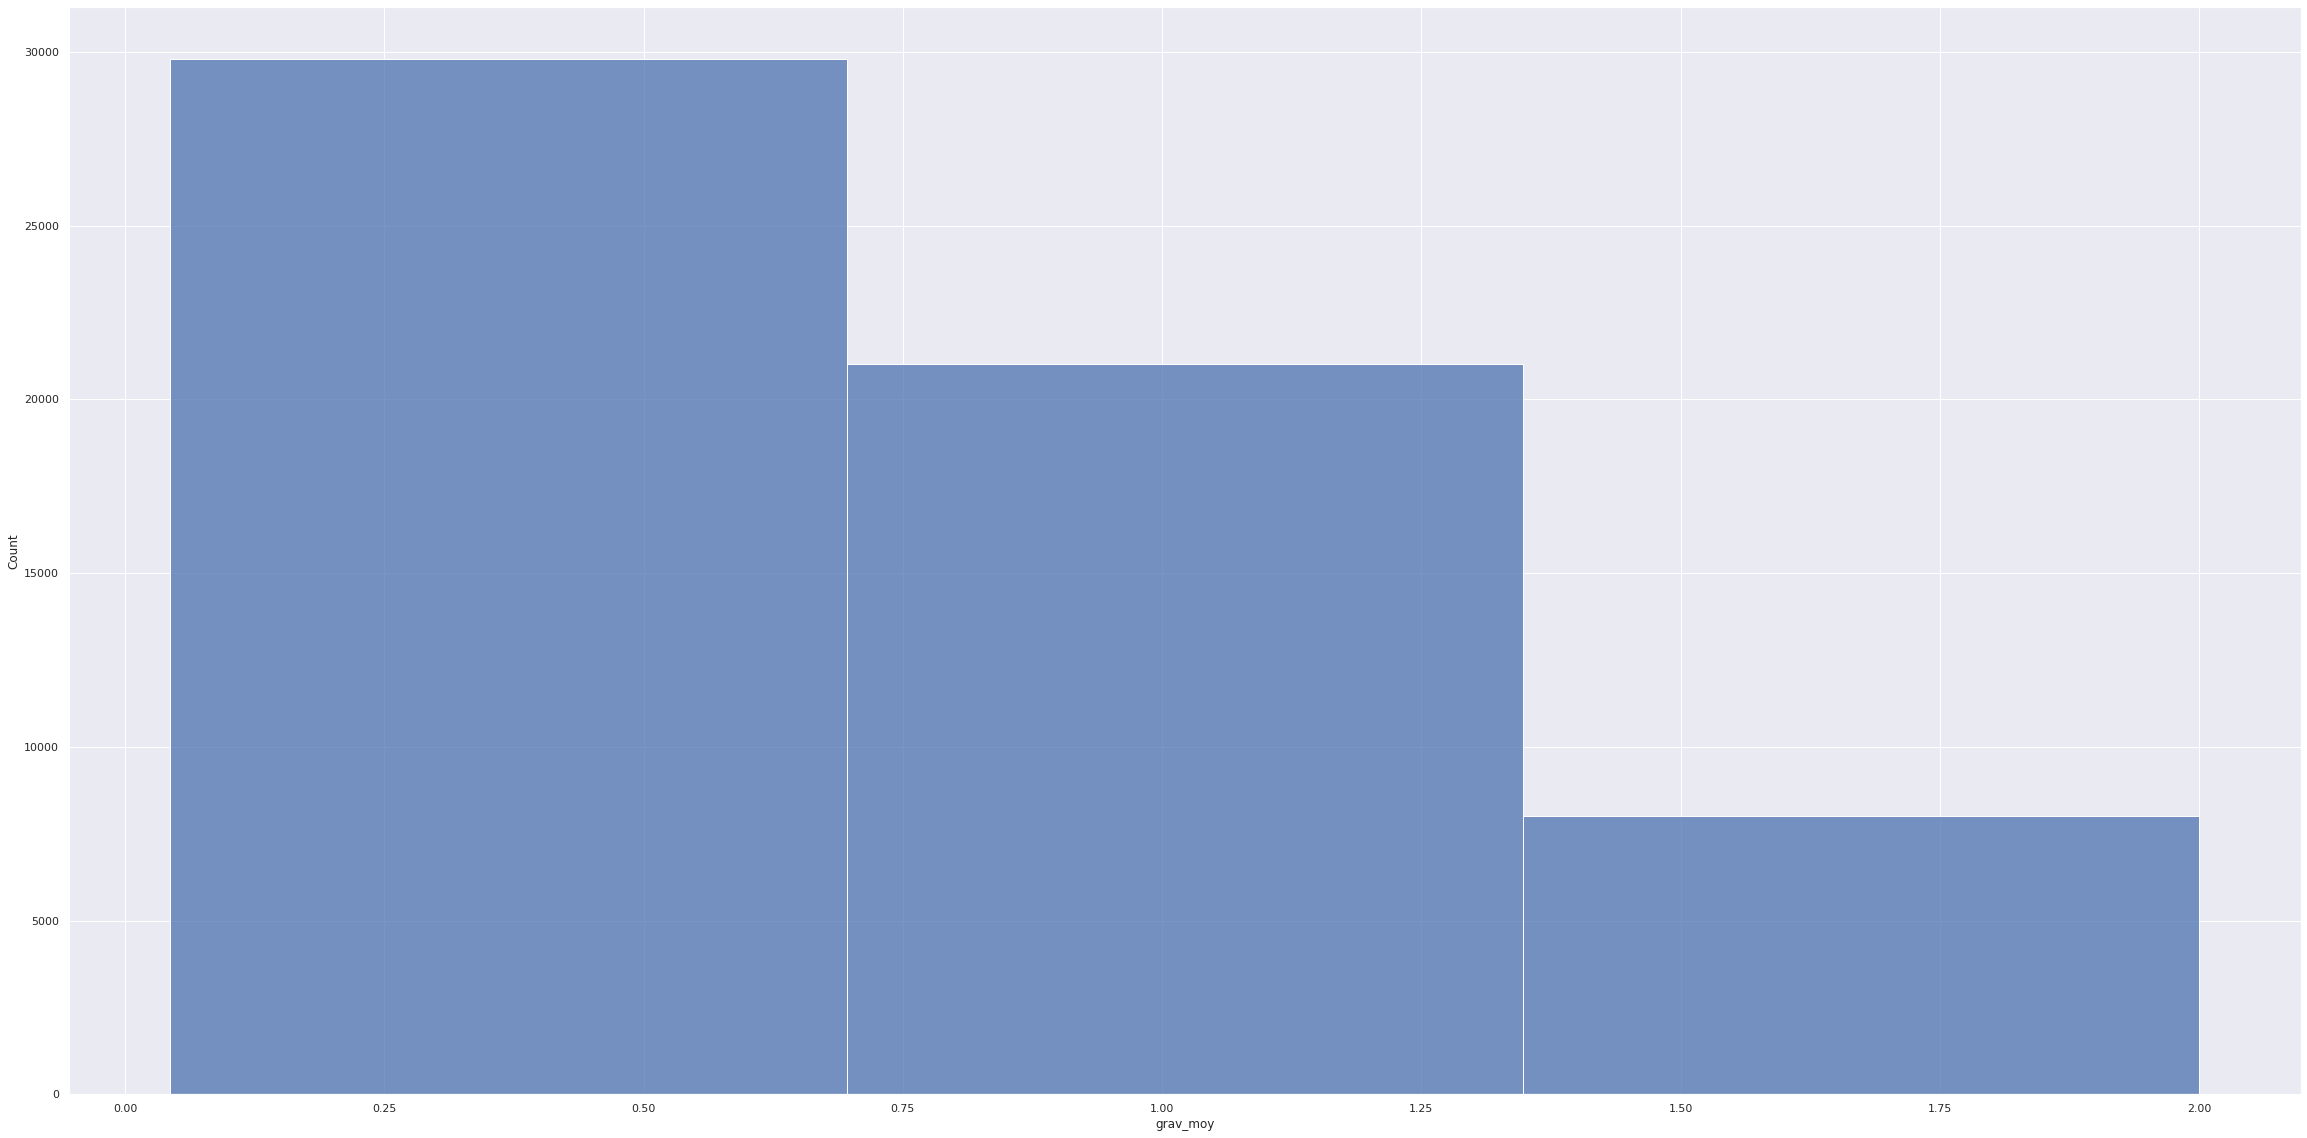

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
plt.figure(figsize=(40, 20))
ax = sns.histplot(x="grav_moy", data=vrai_data, bins=3, stat="count")

In [60]:
vrai_data["grav_moy_class"] = 0
vrai_data["grav_moy_class"][(vrai_data["grav_moy"]>=0) & (vrai_data["grav_moy"]<=0.51)]=1
vrai_data["grav_moy_class"][(vrai_data["grav_moy"]>0.51) & (vrai_data["grav_moy"]<1.01)]=2
vrai_data["grav_moy_class"][(vrai_data["grav_moy"]>=1.01) & (vrai_data["grav_moy"]<=2)]=3

print( vrai_data["grav_moy_class"])

0        2
1        2
2        1
3        1
4        1
        ..
58835    2
58836    2
58837    2
58838    3
58839    1
Name: grav_moy_class, Length: 58840, dtype: int64


<ipython-input-60-e037b9299c2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vrai_data["grav_moy_class"] = 0
<ipython-input-60-e037b9299c2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vrai_data["grav_moy_class"][(vrai_data["grav_moy"]>=0) & (vrai_data["grav_moy"]<=0.51)]=1
/home/simplon/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:8861: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [61]:
vrai_data["grav_moy_class"].value_counts()

1    26135
2    23618
3     9087
Name: grav_moy_class, dtype: int64

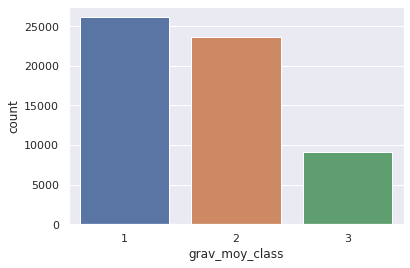

In [62]:
import seaborn as sns
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="grav_moy_class", data=vrai_data)

In [63]:
vrai_data = vrai_data[vrai_data["atm"]!=-1]

In [64]:
vrai_data['journee'] = vrai_data['journee'].replace('Monday', 1)
vrai_data['journee'] = vrai_data['journee'].replace('Tuesday', 2)
vrai_data['journee'] = vrai_data['journee'].replace('Wednesday', 3)
vrai_data['journee'] = vrai_data['journee'].replace('Thursday', 4)
vrai_data['journee'] = vrai_data['journee'].replace('Friday', 5)
vrai_data['journee'] = vrai_data['journee'].replace('Saturday',6)
vrai_data['journee'] = vrai_data['journee'].replace('Sunday', 7)

print(vrai_data['journee'].unique())


#Monday Tuesday Wednesday Thursday Friday Saturday Sunday

[6 4 5 3 1 2 7]


In [65]:
print(vrai_data[vrai_data['journee']==1])

       lum dep  agg  atm       date  cat_time  journee  grav_moy  vacances  \
29       1  78    2    8 2019-11-25         1        1       1.0         2   
107      2  63    2    1 2019-09-16         3        1       0.5         2   
109      1  62    2    1 2019-09-02         1        1       1.5         2   
152      1  64    1    1 2019-02-18         1        1       1.0         2   
181      1  28    1    1 2019-02-18         1        1       1.0         2   
...    ...  ..  ...  ...        ...       ...      ...       ...       ...   
58693    1  27    2    1 2019-12-02         1        1       1.0         2   
58695    1  60    2    1 2019-12-02         1        1       0.5         2   
58697    5  60    2    1 2019-12-02         2        1       2.0         2   
58700    1  59    2    7 2019-12-02         1        1       1.0         2   
58740    5  62    2    8 2019-11-25         3        1       0.4         2   

       grav_moy_class  
29                  2  
107            

In [66]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDRegressor

from sklearn import svm, datasets

X = np.c_[vrai_data[["dep","lum", "agg","atm","date","cat_time","journee","vacances"]]]
y = y_train = np.array(vrai_data["grav_moy_class"])



model = make_pipeline(OneHotEncoder(handle_unknown='ignore'),
                     SGDClassifier(loss='log',max_iter=1500))


ac_score = []

kf = StratifiedShuffleSplit(n_splits=5,test_size=0.1, random_state=42)

for train_index, test_index in kf.split(X, y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    ac_score.append(accuracy_score(y_test, model.predict(X_test)))
    
print(np.mean(ac_score))
print(ac_score)

0.5343303874915024
[0.5256628144119646, 0.5341604350781781, 0.5317811012916384, 0.5345003399048266, 0.5455472467709042]


In [75]:

from joblib import dump

dump(model, 'visa.joblib')


['visa.joblib']

In [73]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

X = np.c_[vrai_data[["dep","lum", "agg","atm","date","cat_time","journee","vacances"]]]
y = y_train = np.array(vrai_data["grav_moy_class"])

X, y = make_multilabel_classification(random_state=0)

inner_clf = LogisticRegression(solver="liblinear", random_state=0)
clf = MultiOutputClassifier(inner_clf).fit(X, y)
y_score = np.transpose([y_pred[:, 1] for y_pred in clf.predict_proba(X)])
roc_auc_score(y, y_score, average=None)

print(np.mean(roc_auc_score(y, y_score, average=None)))

0.8854334613594667


In [74]:
from joblib import dump

dump(clf, 'vi.joblib')


['vi.joblib']